<a href="https://colab.research.google.com/github/diptipatil231/Web_Project/blob/main/Pratiksha_minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perform regression analysis to predict the profit of each the 50 startups
mentioned in the dataset by taking all the input parameters(multi linear
regression).**

In [ ]:
#importing libraries
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the dataset
import seaborn as sns # for visualization
import sklearn # for model evaluation and development

In [ ]:
#importing file
df=pd.read_csv("/content/drive/MyDrive/50_Startups.csv")

In [ ]:
#analyzing data
df.head() #first 5 rows

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.tail() #last 5 rows

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
#Numerical analysis of the dataset
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
#Dimensions of dataset
print('There are ',df.shape[0],'rows and ',df.shape[1],'columns in the dataset.')

There are  50 rows and  5 columns in the dataset.


In [ ]:
#Check for NULL values
df.isnull().sum()
#There are no null values in the dataset.

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
#Schema of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
c = df.corr() #used to find the pairwise correlation of all columns in the dataframe
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


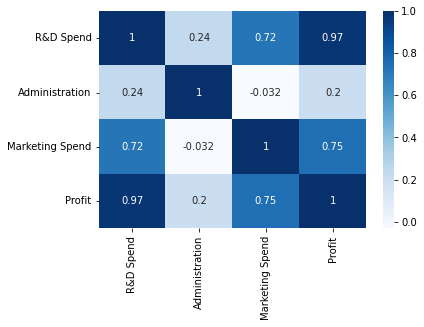

In [ ]:
#EDA(Exploratory Data Analysis) on dataset
#Correlation matrix
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


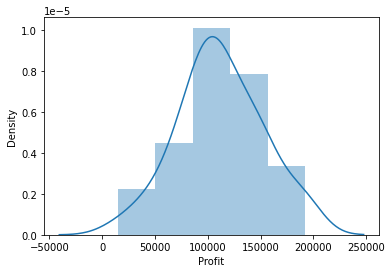

In [ ]:
sns.distplot(df['Profit'],bins=5,kde=True)

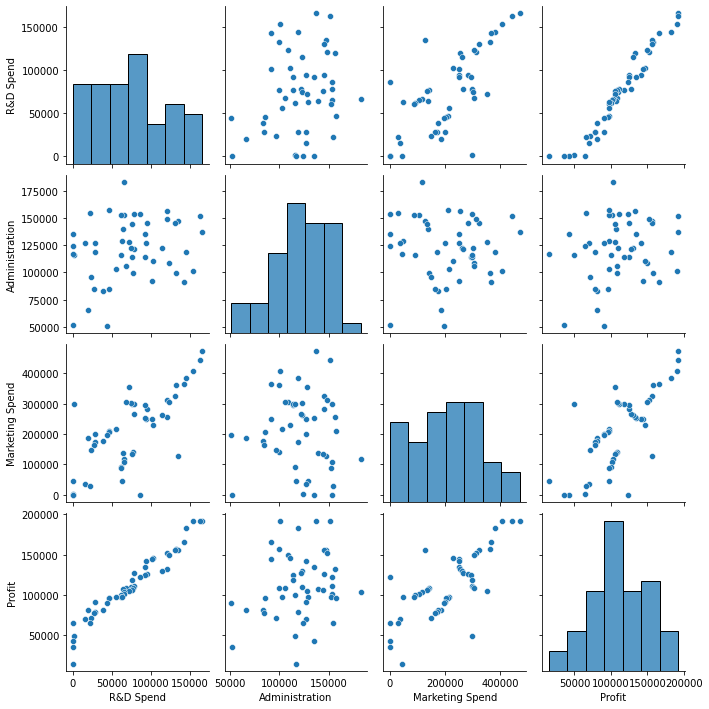

In [ ]:
sns.pairplot(df)

**Model Development**

In [ ]:
# spliting Dataset in Dependent & Independent Variables
x = df.iloc[:, :-1].values
y = df.iloc[:, 4].values
print(x.shape)
print(y.shape)

(50, 4)
(50,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
#Label Encoder: Encode labels with values between 0 and n_classes-1.

labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])
X1 = pd.DataFrame(x)
X1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [ ]:
# TRAIN TEST SPLIT ON THE INPUTS AND OUTPUTS 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [ ]:
x_train.shape

(37, 4)

In [ ]:
x_test.shape

(13, 4)

In [ ]:
y_train.shape

(37,)

In [ ]:
y_test.shape

(13,)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred 

array([104857.41104282, 132192.84338785, 133322.963019  ,  72110.67322561,
       179086.14893162, 114829.75156248,  65940.13335569,  98671.39019185,
       114454.33290684, 168407.96691121,  96180.82153851,  87641.57271011,
       110907.68006026])

**Testing scores**

In [ ]:


testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score*100)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score*100)

Model Score/Performance on Testing data 93.254478942423
Model Score/Performance on Training data 95.1146117979294


In [ ]:
#Comparing the predicted values and actual values

df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,104857.411043,103282.38
1,132192.843388,144259.40
2,133322.963019,146121.95
3,72110.673226,77798.83
4,179086.148932,191050.39
5,114829.751562,105008.31
6,65940.133356,81229.06
7,98671.390192,97483.56
8,114454.332907,110352.25
9,168407.966911,166187.94


**Model evaluation**

In [ ]:
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 92.89015949341058


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 7277014538.700721
